<a href="https://colab.research.google.com/github/thanishka220/Data-Analytics-Project/blob/main/customer_churn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install eli5 shap



In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report




In [18]:

data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
data.info()
data.describe()
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


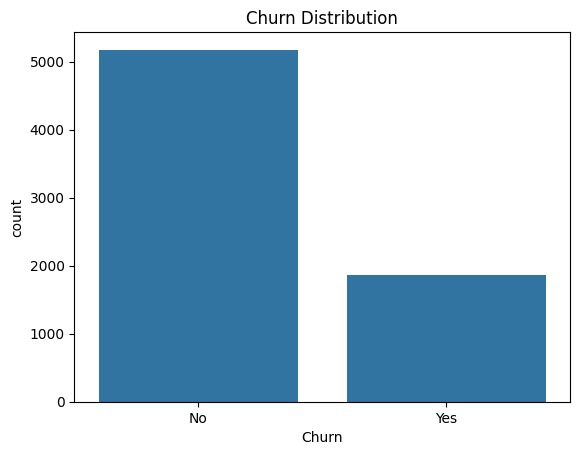

In [20]:
sns.countplot(x='Churn', data=data)
plt.title("Churn Distribution")
plt.show()


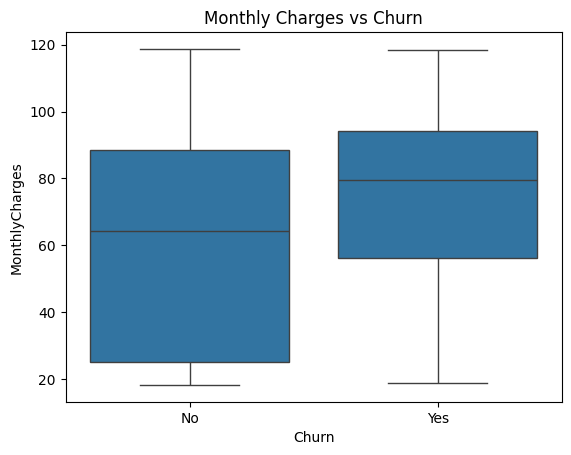

In [21]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title("Monthly Charges vs Churn")
plt.show()


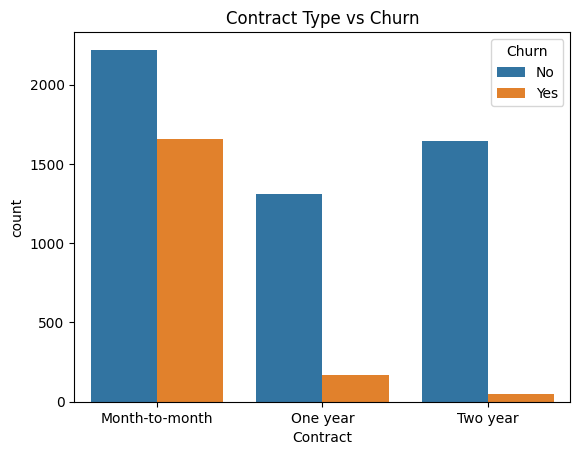

In [22]:
sns.countplot(x='Contract', hue='Churn', data=data)
plt.title("Contract Type vs Churn")
plt.show()


In [23]:

data.isnull().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                    'PaperlessBilling', 'PaymentMethod']

for col in categorical_cols:
    if col in data.columns:
        data[col] = le.fit_transform(data[col])
e
data['Churn'] = le.fit_transform(data['Churn'])


In [30]:

data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

print(data['TotalCharges'].isnull().sum())


11


In [31]:
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())



In [32]:
print(data['TotalCharges'].isnull().sum())


0


In [33]:
print(data.dtypes)


gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object


In [26]:
if 'customerID' in data.columns:
    data.drop(['customerID'], axis=1, inplace=True)


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = data.drop('Churn', axis=1)
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7955997161107168
[[945  91]
 [197 176]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409



In [38]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=42).fit(X_test, y_test)

eli5.show_weights(perm, feature_names=X_test.columns.tolist())


Weight,Feature
0.0219 ± 0.0065,tenure
0.0176 ± 0.0161,Contract
0.0101 ± 0.0080,MonthlyCharges
0.0087 ± 0.0104,OnlineSecurity
0.0084 ± 0.0066,InternetService
0.0079 ± 0.0098,TechSupport
0.0064 ± 0.0038,SeniorCitizen
0.0021 ± 0.0043,Partner
0.0021 ± 0.0055,gender
0.0020 ± 0.0033,PaymentMethod


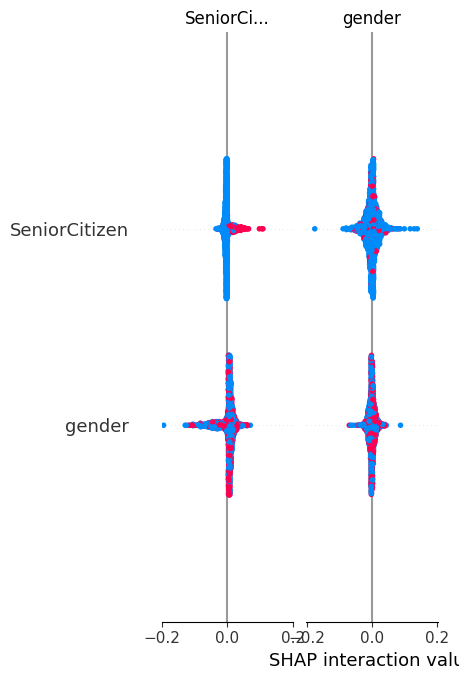

In [39]:
import shap

explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)



In [40]:

data['Churn_Prob'] = model.predict_proba(data.drop('Churn', axis=1))[:,1]



In [41]:
def segment_customer(row):
    if row['Churn_Prob'] > 0.7:
        return 'At Risk'
    elif row['Churn_Prob'] < 0.3:
        return 'Loyal'
    else:
        return 'Dormant'

data['Segment'] = data.apply(segment_customer, axis=1)


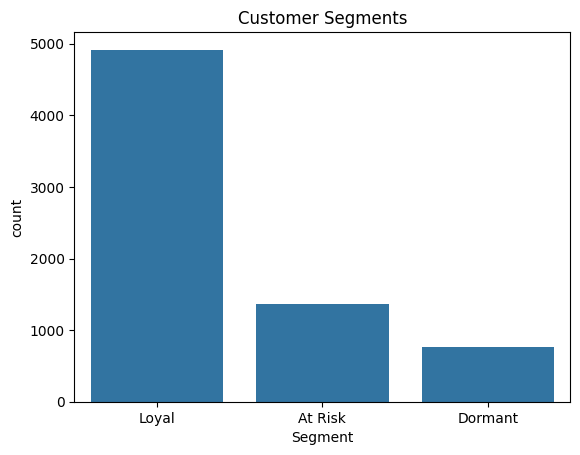

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Segment', data=data)
plt.title("Customer Segments")
plt.show()


In [43]:

data['Segment'].value_counts()


,count
Segment,
Loyal,4917
At Risk,1362
Dormant,764


/tmp/ipython-input-790737135.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Segment', data=data, palette='Set2')


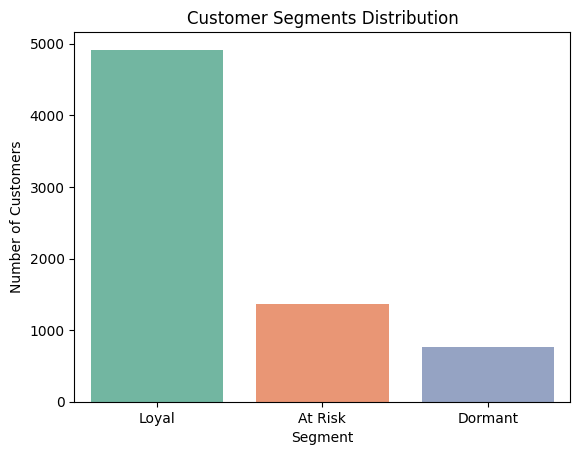

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Segment', data=data, palette='Set2')
plt.title("Customer Segments Distribution")
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.show()


In [45]:

data.to_csv('telco_churn_with_segments.csv', index=False)
